# Importação de bibliotecas e configurações

In [1]:
#importação das bibliotecas
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

# Funções gerais


In [2]:
#estilo dos gráficos
sns.set_palette('Accent')
sns.set_style('darkgrid')

#cria um gráfico de linha simples
def plotar (titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

#cria dois gráficos de linha com o eixo x igual mas com o eixo y diferente
def plot_comparacao(x, y1, y2, dataset, titulo):
    plt.figure(figsize=(12,12))
    ax = plt.subplot(2,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(2,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    #plt.subplot(2,1,3)
    #sns.lineplot(x=x, y=y3, data=dataset)
    #plt.subplot(2,1,4)
    #sns.lineplot(x=x, y=y4, data=dataset)
    ax=ax

#função que separa um tipo de coluna para cada estado
def separarDados(coluna):
  #dados do centro oeste é usado como base para o dataframe final
  dfFinal = CentroOeste[coluna].to_frame()
  #laço de repetição na lista criada no exercicio c para afetar todas as regiões
  for regiao_ in Regioes:
    if(regiao_["regiao"].iloc[0] != "CENTRO-OESTE"):
      dfFinal.insert(0, regiao_["regiao"].iloc[0] + "_" + coluna, regiao_[coluna], allow_duplicates=True )
  dfFinal.rename(columns={coluna:"CENTRO-OESTE" + "_" + coluna}, inplace=True)
  # + "_" + coluna
  return dfFinal

#importação dos dados e preview da tabela gerada

In [3]:
#importação dos dados e preview da tabela gerada
dados = pd.read_csv("https://www.educacao.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-11/edutech_comparativos_metricas.csv", sep= ";")
dados.head(6)

,Ano Censo,Número de Vagas Oferecidas,Número de Tipo de Ingressos,Número de Matrículas,Número de Concluintes,Número de Inscritos,Número de Cursos,Nome Região
0,2017,6075252.0,2135126.0,6529681,947606,14605840.0,33522.0,BRASIL
1,2017,554885.0,208370.0,607357,89956,1306750.0,3072.0,CENTRO-OESTE
2,2017,1138928.0,441493.0,1447248,188730,3804497.0,6715.0,NORDESTE
3,2017,383771.0,143622.0,473716,64851,1367659.0,2513.0,NORTE
4,2017,3086636.0,1026159.0,3003075,458824,6516557.0,14861.0,SUDESTE
5,2017,911032.0,315482.0,998285,145245,1610377.0,6361.0,SUL


# a.Localização e tratamento dos dados nulos

In [4]:
#localização dos dados nulos
dados.isnull().sum()
#com isso e uma olhada no dataframe completo vemos que todos os cursos no exterior tem os dados incompletos e insuficiente para a análise, então removeremos eles
#outra coluna com os dados incompletos é a "Número de Tipo de Ingressos" que não é relevante para a análise, então removeremos ela tambem

Ano Censo                       0
Número de Vagas Oferecidas      2
Número de Tipo de Ingressos    11
Número de Matrículas            0
Número de Concluintes           0
Número de Inscritos             2
Número de Cursos                3
Nome Região                     0
dtype: int64

In [5]:
dados.drop(["Número de Tipo de Ingressos"], axis = 1, inplace = True) 
#sem a coluna "Número de Tipo de Ingressos" as unicas linhas com null são as do exterior, então podemos dropar todas as linhas com null sem nos preocuparmos
dados.dropna(inplace= True)

In [6]:
dados[40:]
#sem linhas do exterior e com o resto dos dados intactos

,Ano Censo,Número de Vagas Oferecidas,Número de Matrículas,Número de Concluintes,Número de Inscritos,Número de Cursos,Nome Região
41,2011,1776263.0,2755635,445615,4147256.0,13874.0,SUDESTE
42,2011,446357.0,929446,135357,1145762.0,5770.0,SUL
43,2010,3120192.0,5449120,829286,6698902.0,28675.0,BRASIL
45,2010,329779.0,495240,70599,668667.0,2531.0,CENTRO-OESTE
46,2010,500771.0,1052161,133834,1619378.0,4897.0,NORDESTE
47,2010,157545.0,352358,44679,476210.0,2066.0,NORTE
48,2010,1693968.0,2656231,447369,3065143.0,13575.0,SUDESTE
49,2010,438129.0,893130,132805,869504.0,5606.0,SUL
50,2009,3526933.0,5115896,826928,7194677.0,27827.0,BRASIL
52,2009,335822.0,453787,68359,616115.0,2504.0,CENTRO-OESTE


# b.Renomeação das colunas

In [7]:
#dicionário que sera usado para a renomeação das colunas
#existem várias outras maneiras de decidir os nomes das colunas mas eu usei os nomes mais simples
renomear = {"Ano Censo" : "ano_censo", "Número de Vagas Oferecidas":"vagas_oferecidas", "Número de Matrículas":"matriculas",	"Número de Concluintes":"concluintes", 
            "Número de Inscritos":"inscritos",	"Número de Cursos":"cursos",	"Nome Região":"regiao"}
dados.rename(columns = renomear, inplace=True)
dados.head()

,ano_censo,vagas_oferecidas,matriculas,concluintes,inscritos,cursos,regiao
0,2017,6075252.0,6529681,947606,14605840.0,33522.0,BRASIL
1,2017,554885.0,607357,89956,1306750.0,3072.0,CENTRO-OESTE
2,2017,1138928.0,1447248,188730,3804497.0,6715.0,NORDESTE
3,2017,383771.0,473716,64851,1367659.0,2513.0,NORTE
4,2017,3086636.0,3003075,458824,6516557.0,14861.0,SUDESTE


# c. Informar as taxas de crescimento ou decaimento ano a ano para todas as regiões do Brasil

In [8]:
#todos os dados das regiões separadas
CentroOeste = dados.query("regiao == 'CENTRO-OESTE'")
Nordeste = dados.query("regiao == 'NORDESTE'")
Norte = dados.query("regiao == 'NORTE'")
Sudeste = dados.query("regiao == 'SUDESTE'")
Sul = dados.query("regiao == 'SUL'")

#agrupamento das regiões para organização
Regioes = [CentroOeste, Nordeste, Norte, Sudeste, Sul]
#taxa de crescimento relativo ao ano anterior para todas as regiões
for regiao in Regioes:
  regiao.index = regiao["ano_censo"]
  regiao.drop(columns=["ano_censo"], inplace=True)
  regiao['crescimento_vagas_%'] = regiao["vagas_oferecidas"].pct_change(-1).round(2) * 100
  regiao['crescimento_matriculas_%'] = regiao.matriculas.pct_change(-1).round(2) * 100
  regiao['crescimento_concluintes_%'] = regiao.concluintes.pct_change(-1).round(2) * 100
  regiao['crescimento_inscritos_%'] = regiao.inscritos.pct_change(-1).round(2) * 100
  regiao.fillna(0, inplace=True)

In [9]:
CentroOeste

,vagas_oferecidas,matriculas,concluintes,inscritos,cursos,regiao,crescimento_vagas_%,crescimento_matriculas_%,crescimento_concluintes_%,crescimento_inscritos_%
ano_censo,,,,,,,,,,
2017,554885.0,607357,89956,1306750.0,3072.0,CENTRO-OESTE,0.0,0.0,5.0,2.0
2016,554091.0,606523,85890,1279507.0,2969.0,CENTRO-OESTE,8.0,-2.0,-5.0,-12.0
2015,513796.0,617317,89968,1447738.0,2886.0,CENTRO-OESTE,9.0,1.0,13.0,20.0
2014,469341.0,611927,79274,1210613.0,2801.0,CENTRO-OESTE,30.0,6.0,2.0,14.0
2013,362212.0,575515,77539,1064282.0,2707.0,CENTRO-OESTE,19.0,5.0,-8.0,15.0
2012,303363.0,547768,83971,926665.0,2629.0,CENTRO-OESTE,-2.0,2.0,3.0,11.0
2011,308484.0,537006,81242,833043.0,2595.0,CENTRO-OESTE,-6.0,8.0,15.0,25.0
2010,329779.0,495240,70599,668667.0,2531.0,CENTRO-OESTE,-2.0,9.0,3.0,9.0
2009,335822.0,453787,68359,616115.0,2504.0,CENTRO-OESTE,0.0,0.0,0.0,0.0


In [10]:
Nordeste

,vagas_oferecidas,matriculas,concluintes,inscritos,cursos,regiao,crescimento_vagas_%,crescimento_matriculas_%,crescimento_concluintes_%,crescimento_inscritos_%
ano_censo,,,,,,,,,,
2017,1138928.0,1447248,188730,3804497.0,6715.0,NORDESTE,0.0,0.0,5.0,-1.0
2016,1134737.0,1444368,179953,3827094.0,6417.0,NORDESTE,14.0,1.0,7.0,-6.0
2015,995752.0,1433406,167894,4059361.0,6180.0,NORDESTE,11.0,4.0,9.0,12.0
2014,893157.0,1378920,154726,3615836.0,6016.0,NORDESTE,23.0,7.0,4.0,15.0
2013,723326.0,1287552,149370,3156889.0,5709.0,NORDESTE,29.0,6.0,0.0,2.0
2012,560293.0,1213519,148800,3100919.0,5547.0,NORDESTE,7.0,7.0,0.0,34.0
2011,524703.0,1138958,148141,2312190.0,5075.0,NORDESTE,5.0,8.0,11.0,43.0
2010,500771.0,1052161,133834,1619378.0,4897.0,NORDESTE,-3.0,9.0,2.0,7.0
2009,515028.0,965502,130829,1508888.0,4655.0,NORDESTE,0.0,0.0,0.0,0.0


In [11]:
Norte

,vagas_oferecidas,matriculas,concluintes,inscritos,cursos,regiao,crescimento_vagas_%,crescimento_matriculas_%,crescimento_concluintes_%,crescimento_inscritos_%
ano_censo,,,,,,,,,,
2017,383771.0,473716,64851,1367659.0,2513.0,NORTE,-8.0,0.0,-8.0,-2.0
2016,416474.0,473479,70367,1397271.0,2475.0,NORTE,40.0,-0.0,4.0,-9.0
2015,297268.0,473848,67897,1536018.0,2427.0,NORTE,5.0,5.0,20.0,6.0
2014,283268.0,450844,56786,1454085.0,2409.0,NORTE,23.0,6.0,6.0,34.0
2013,229728.0,423565,53357,1088168.0,2307.0,NORTE,23.0,5.0,4.0,26.0
2012,187297.0,404727,51382,860349.0,2340.0,NORTE,8.0,5.0,-6.0,18.0
2011,172864.0,385717,54806,728336.0,2192.0,NORTE,10.0,9.0,23.0,53.0
2010,157545.0,352358,44679,476210.0,2066.0,NORTE,-18.0,12.0,2.0,-5.0
2009,193168.0,313959,43592,499657.0,2004.0,NORTE,0.0,0.0,0.0,0.0


In [12]:
Sudeste

,vagas_oferecidas,matriculas,concluintes,inscritos,cursos,regiao,crescimento_vagas_%,crescimento_matriculas_%,crescimento_concluintes_%,crescimento_inscritos_%
ano_censo,,,,,,,,,,
2017,3086636.0,3003075,458824,6516557.0,14861.0,SUDESTE,-4.0,-1.0,-0.0,6.0
2016,3202510.0,3020865,460629,6166490.0,14849.0,SUDESTE,3.0,-2.0,2.0,-0.0
2015,3105225.0,3087825,450446,6196092.0,14614.0,SUDESTE,17.0,1.0,10.0,2.0
2014,2659977.0,3048811,410939,6081265.0,14451.0,SUDESTE,26.0,5.0,-2.0,10.0
2013,2109240.0,2903089,418513,5514733.0,14240.0,SUDESTE,17.0,3.0,-8.0,17.0
2012,1806651.0,2816086,456283,4718554.0,14416.0,SUDESTE,2.0,2.0,2.0,14.0
2011,1776263.0,2755635,445615,4147256.0,13874.0,SUDESTE,5.0,4.0,-0.0,35.0
2010,1693968.0,2656231,447369,3065143.0,13575.0,SUDESTE,-15.0,6.0,-0.0,-19.0
2009,1998509.0,2516712,447811,3764394.0,13278.0,SUDESTE,0.0,0.0,0.0,0.0


In [13]:
Sul

,vagas_oferecidas,matriculas,concluintes,inscritos,cursos,regiao,crescimento_vagas_%,crescimento_matriculas_%,crescimento_concluintes_%,crescimento_inscritos_%
ano_censo,,,,,,,,,,
2017,911032.0,998285,145245,1610377.0,6361.0,SUL,4.0,-1.0,2.0,-7.0
2016,872439.0,1009048,141893,1736982.0,6249.0,SUL,4.0,-1.0,1.0,-3.0
2015,837134.0,1021149,140158,1784979.0,6187.0,SUL,14.0,3.0,3.0,2.0
2014,732649.0,995669,135579,1746401.0,6099.0,SUL,15.0,3.0,3.0,13.0
2013,637968.0,962684,131159,1541681.0,6013.0,SUL,37.0,2.0,-3.0,17.0
2012,466803.0,941738,135655,1321288.0,5930.0,SUL,5.0,1.0,0.0,15.0
2011,446357.0,929446,135357,1145762.0,5770.0,SUL,2.0,4.0,2.0,32.0
2010,438129.0,893130,132805,869504.0,5606.0,SUL,-7.0,3.0,-3.0,10.0
2009,471865.0,865936,136337,791152.0,5386.0,SUL,0.0,0.0,0.0,0.0


# d. Informar o número de vagas oferecidas por região ano a ano;



In [14]:
df_vagas = separarDados("vagas_oferecidas")
df_vagas

,SUL_vagas_oferecidas,SUDESTE_vagas_oferecidas,NORTE_vagas_oferecidas,NORDESTE_vagas_oferecidas,CENTRO-OESTE_vagas_oferecidas
ano_censo,,,,,
2017,911032.0,3086636.0,383771.0,1138928.0,554885.0
2016,872439.0,3202510.0,416474.0,1134737.0,554091.0
2015,837134.0,3105225.0,297268.0,995752.0,513796.0
2014,732649.0,2659977.0,283268.0,893157.0,469341.0
2013,637968.0,2109240.0,229728.0,723326.0,362212.0
2012,466803.0,1806651.0,187297.0,560293.0,303363.0
2011,446357.0,1776263.0,172864.0,524703.0,308484.0
2010,438129.0,1693968.0,157545.0,500771.0,329779.0
2009,471865.0,1998509.0,193168.0,515028.0,335822.0


# e. Avaliar se com o aumento das vagas, existem um maior número de ingressos;

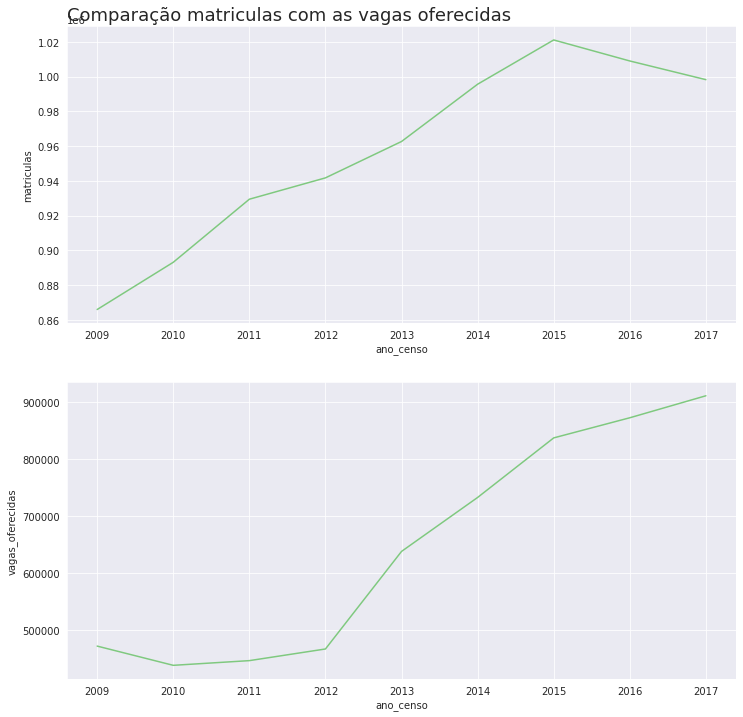

In [15]:
#plot_comparacao("ano_censo", "crescimento_matriculas_%", "crescimento_vagas_%", Sul, "Comparação")
plot_comparacao("ano_censo", "matriculas", "vagas_oferecidas", Sul, "Comparação matriculas com as vagas oferecidas")

Podemos deduzir que não, visto que as duas estatisticas crescem mas não são proporcionais uma a outra

# f. Informar se houve crescimento no número de matrículas por região e destacar casos expressivos 

In [16]:
dfMatP = separarDados("crescimento_matriculas_%")
dfMatP

,SUL_crescimento_matriculas_%,SUDESTE_crescimento_matriculas_%,NORTE_crescimento_matriculas_%,NORDESTE_crescimento_matriculas_%,CENTRO-OESTE_crescimento_matriculas_%
ano_censo,,,,,
2017,-1.0,-1.0,0.0,0.0,0.0
2016,-1.0,-2.0,-0.0,1.0,-2.0
2015,3.0,1.0,5.0,4.0,1.0
2014,3.0,5.0,6.0,7.0,6.0
2013,2.0,3.0,5.0,6.0,5.0
2012,1.0,2.0,5.0,7.0,2.0
2011,4.0,4.0,9.0,8.0,8.0
2010,3.0,6.0,12.0,9.0,9.0
2009,0.0,0.0,0.0,0.0,0.0


Como pode ser observado no data frame, em 2010 todas as regiões tiveram um aumento consideravel no número de matriculas, especialmente o Norte.
Em contradição, nos anos mais recentes(2015 - 2017) todas as regiões tiveram uma estabilização no crescimento e até uma decaida no número de matriculas 

# g. Informar o número de concluintes em cada região e apontar qual é a região com maior dificuldade;

In [17]:
#Dataframe com os alunos concluintes
dfCon = separarDados("concluintes")
dfCon

,SUL_concluintes,SUDESTE_concluintes,NORTE_concluintes,NORDESTE_concluintes,CENTRO-OESTE_concluintes
ano_censo,,,,,
2017,145245,458824,64851,188730,89956
2016,141893,460629,70367,179953,85890
2015,140158,450446,67897,167894,89968
2014,135579,410939,56786,154726,79274
2013,131159,418513,53357,149370,77539
2012,135655,456283,51382,148800,83971
2011,135357,445615,54806,148141,81242
2010,132805,447369,44679,133834,70599
2009,136337,447811,43592,130829,68359


In [18]:
dfMat = separarDados("matriculas")
dfCon.columns = ["SUL","SUDESTE","NORTE",	"NORDESTE",	"CENTRO-OESTE"]
dfMat.columns = ["SUL","SUDESTE","NORTE",	"NORDESTE",	"CENTRO-OESTE"]
#renomeando as colunas para a operação não dar erro

In [19]:
#data frame com os alunos que se matricularam mas não terminaram os cursos
df_nao_concluentes = dfMat - dfCon
df_nao_concluentes

,SUL,SUDESTE,NORTE,NORDESTE,CENTRO-OESTE
ano_censo,,,,,
2017,853040,2544251,408865,1258518,517401
2016,867155,2560236,403112,1264415,520633
2015,880991,2637379,405951,1265512,527349
2014,860090,2637872,394058,1224194,532653
2013,831525,2484576,370208,1138182,497976
2012,806083,2359803,353345,1064719,463797
2011,794089,2310020,330911,990817,455764
2010,760325,2208862,307679,918327,424641
2009,729599,2068901,270367,834673,385428


In [20]:
#con * 100 / mat
for column in dfCon:
  print("Média " + column + " concluintes:")
  print(round(dfCon[column].mean()))
#média de alunos que concluiram os cursos

Média SUL concluintes:
137132
Média SUDESTE concluintes:
444048
Média NORTE concluintes:
56413
Média NORDESTE concluintes:
155809
Média CENTRO-OESTE concluintes:
80755


In [21]:
for column in df_nao_concluentes:
  print("Média " + column + "_nao_concluintes:")
  print(round(df_nao_concluentes[column].mean()))
#média dos alunos que não concluiram os cursos

Média SUL_nao_concluintes:
820322
Média SUDESTE_nao_concluintes:
2423544
Média NORTE_nao_concluintes:
360500
Média NORDESTE_nao_concluintes:
1106595
Média CENTRO-OESTE_nao_concluintes:
480627


In [22]:
df_porcentagem_concluiram = round(dfCon * 100 / dfMat)

for column in df_porcentagem_concluiram:
  print("Média " + column + " porcentagem de alunos matriculados que concluiram seus cursos:")
  print(round(df_porcentagem_concluiram[column].mean()))

Média SUL porcentagem de alunos matriculados que concluiram seus cursos:
15
Média SUDESTE porcentagem de alunos matriculados que concluiram seus cursos:
15
Média NORTE porcentagem de alunos matriculados que concluiram seus cursos:
14
Média NORDESTE porcentagem de alunos matriculados que concluiram seus cursos:
12
Média CENTRO-OESTE porcentagem de alunos matriculados que concluiram seus cursos:
14


Como podemos observar pela porcentagem média de alunos que concluem os cursos o Nordeste é o com a menor taixa de conclusão, mas é interessante notar na quantidade média de alunos matriculados e que concluem os cursos nos outros estados

# h. Analisar comparativamente o número de inscritos com o número de matrículas;

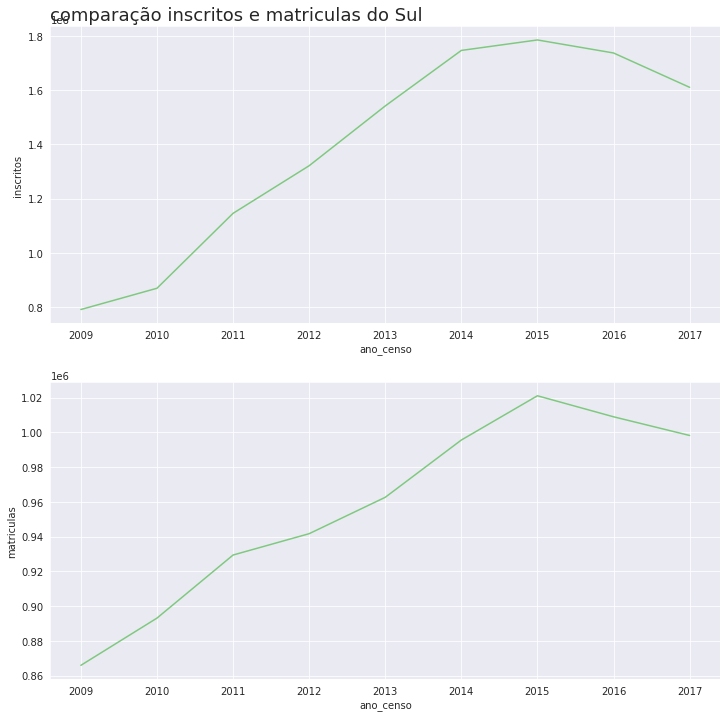

In [23]:
plot_comparacao("ano_censo", "inscritos", "matriculas", Sul, "comparação inscritos e matriculas do Sul")

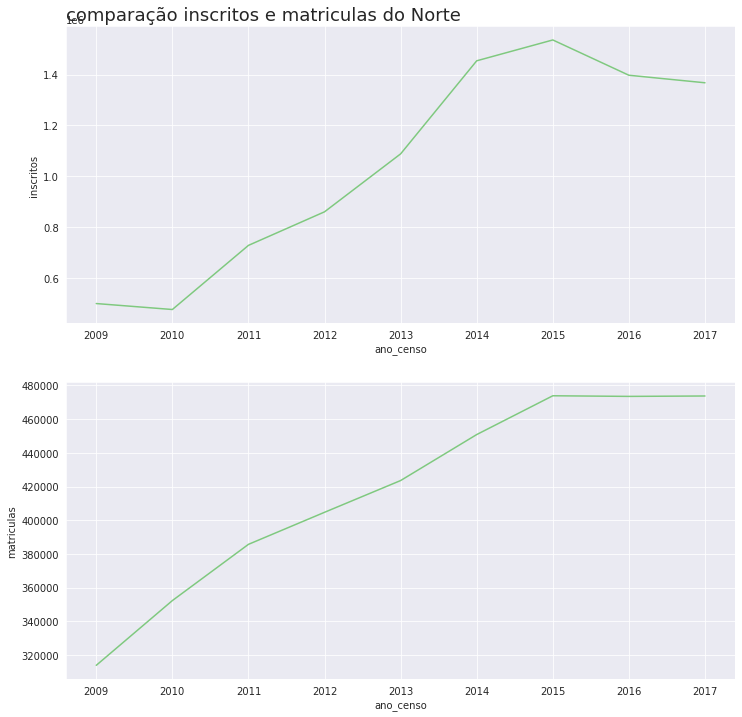

In [24]:
plot_comparacao("ano_censo", "inscritos", "matriculas", Norte, "comparação inscritos e matriculas do Norte")

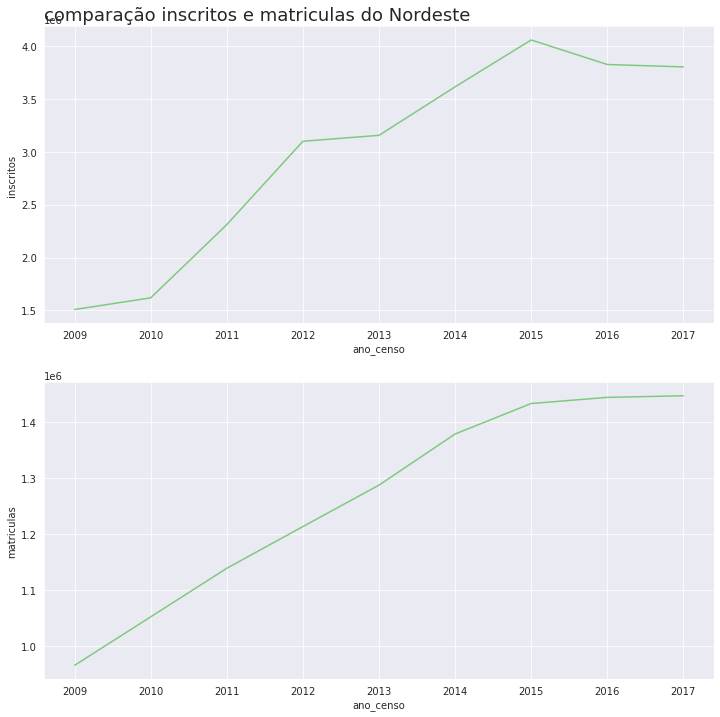

In [25]:
plot_comparacao("ano_censo", "inscritos", "matriculas", Nordeste, "comparação inscritos e matriculas do Nordeste")

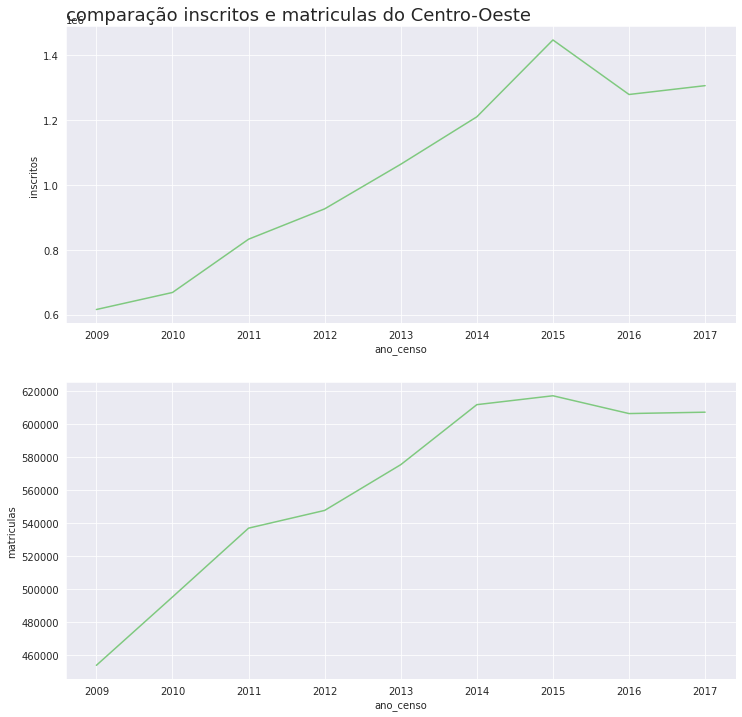

In [26]:
plot_comparacao("ano_censo", "inscritos", "matriculas", CentroOeste, "comparação inscritos e matriculas do Centro-Oeste")

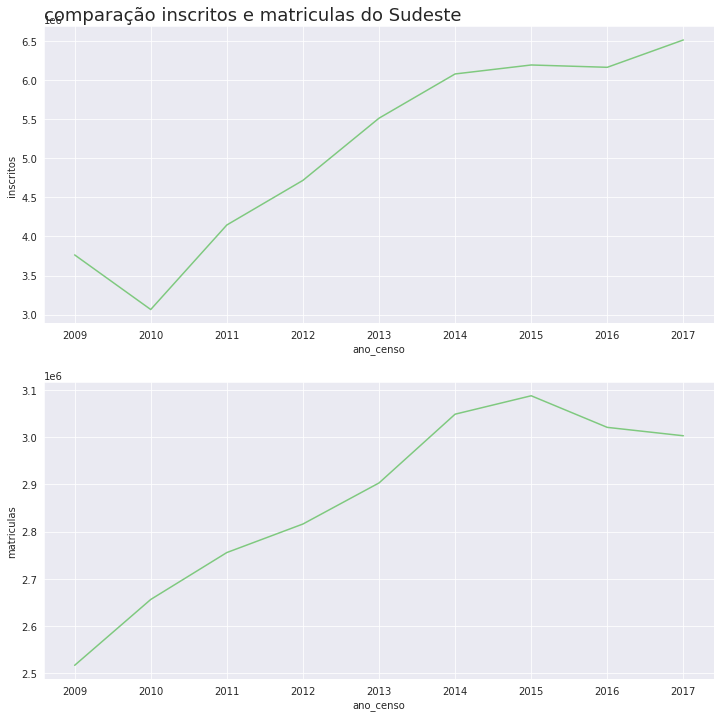

In [27]:
plot_comparacao("ano_censo", "inscritos", "matriculas", Sudeste, "comparação inscritos e matriculas do Sudeste")

Por meio  dos gráficos podemos observar um aumento nas matriculas proporcional ao numero de inscritos

#  i. Verificar se o número de cursos ofertados na região impactam no aumento de inscritos e/ou número de matrículas

Dados da região Sul:

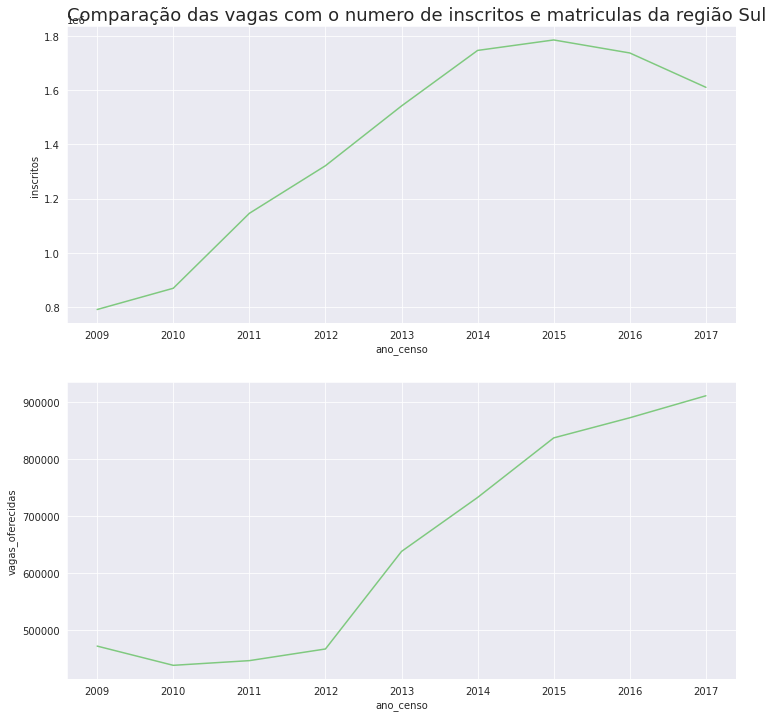

In [28]:
plot_comparacao("ano_censo", "inscritos", "vagas_oferecidas", Sul, "Comparação das vagas com o numero de inscritos e matriculas da região Sul")

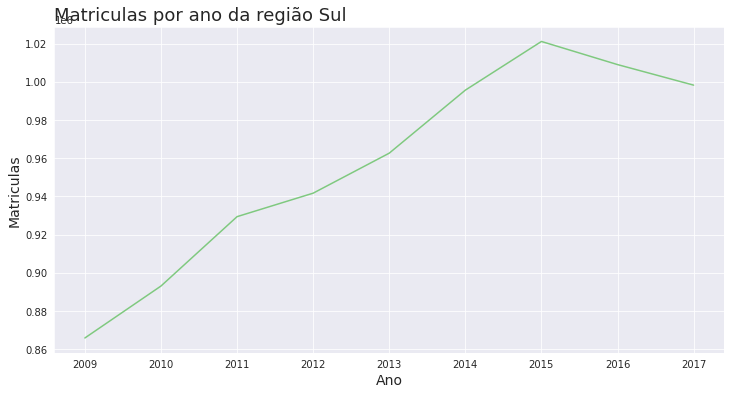

In [29]:
plotar("Matriculas por ano da região Sul", "Ano", "Matriculas", "ano_censo", "matriculas", Sul)

Dados da região Norte:

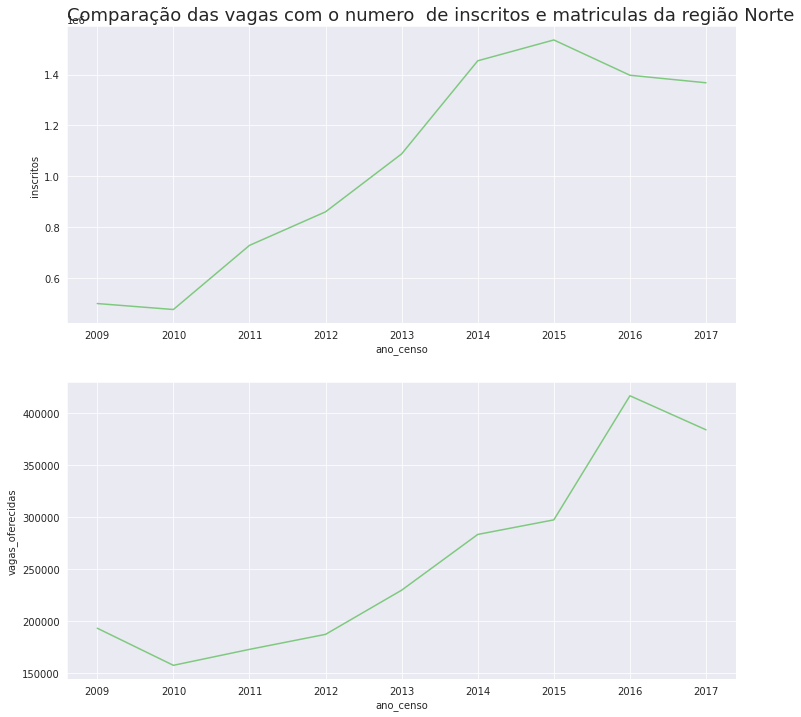

In [30]:
plot_comparacao("ano_censo", "inscritos", "vagas_oferecidas", Norte, "Comparação das vagas com o numero  de inscritos e matriculas da região Norte")

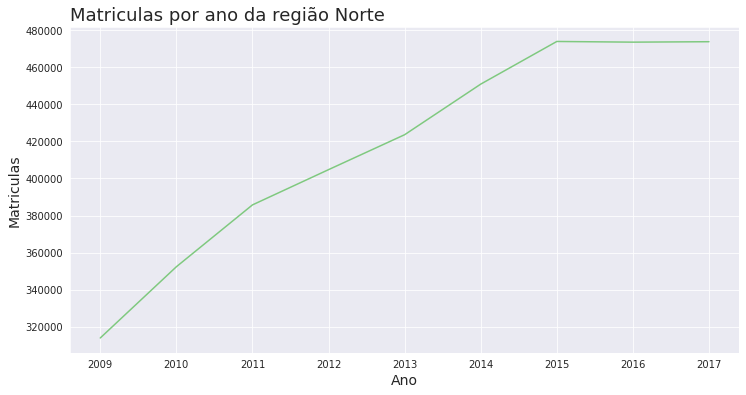

In [31]:
plotar("Matriculas por ano da região Norte", "Ano", "Matriculas", "ano_censo", "matriculas", Norte)

Analisando os gráficos da região Sul e Norte podemos deduzir que não, a quantidade de vagas oferecidas não tem um impacto direto com o crescimento de inscritos e matriculas, vendo que todos os gráficos tem um crescimento constante mas com seus picos em anos diferentes

#  j. Mostrar com o gráficos apropriados os resultados listados anteriormente;

Já feito nos exercicios anteriores

#  k. Gerar uma conclusão pessoal sobre os resultados apresentados;

Com todos os dados podemos observar algumas coisa:


1.   Nordeste é a região com a menor taixa de conclusão dos cursos, enquanto o Sul e o Norte são as que tem mais taixa de conclusão, com o Norte tendo a maior quantidade de inscritos e matriculados dentro de todas as regiões
2.   O aumento na quantidade de inscritos relativo aos anos passados variam bastante em alguns anos, chegando até em 53% no Norte em 2011 e tendo, nesse mesmo ano, um aumento consideravel nas outras regiões, que nos anos seguintes se estabiliza
1.   Também pode se observar um aumento consideravel nas vagas oferecidas em todos os estados nos anos de 2013 até 2015
2.   Sobre o resto dos dados, todos tem um crescimento constante, especialmente nos primeiros anos, e se estabilizam nos anos mais recentes

